In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [3]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [4]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [5]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [7]:
df['ST_NUM'].isnull().sum()

2

In [10]:
df['OWN_OCCUPIED'].isnull().sum()

1

In [11]:
df['NUM_BEDROOMS'].isnull().sum()

2

In [14]:
df['NUM_BEDROOMS'].value_counts()

3     3
1     1
na    1
--    1
2     1
Name: NUM_BEDROOMS, dtype: int64

In [15]:
missing_values = ["n/a", "na", "--"]

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values = missing_values)


In [17]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [18]:
df['NUM_BEDROOMS'].isnull().sum()

4

In [19]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [20]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [22]:
cnt=0
for row in df['NUM_BATH']:
    try:
        int(row)
    except ValueError:
        df.loc[cnt, 'NUM_BATH']=np.nan
        pass
    cnt+=1

In [23]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,NaN,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [24]:
df.isnull().values.any()

True

In [25]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        3
SQ_FT           2
dtype: int64

In [26]:
df.isnull().sum().sum()

14

In [27]:
df['ST_NUM'].fillna(125, inplace=True)

In [28]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,NaN,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [29]:
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [30]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,NaN,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [32]:
%matplotlib inline
data = pd.ExcelFile('obes.xls')

In [34]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [35]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)


In [36]:
data_age.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)


In [38]:
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [39]:
data_age.dropna(inplace=True)

In [40]:
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [41]:
data_age.set_index('Year', inplace=True)
data_age.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


<AxesSubplot:xlabel='Year'>

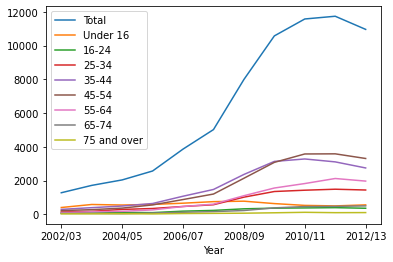

In [42]:
data_age.plot()

In [43]:
data_age_minus_total = data_age.drop('Total', axis=1)

<AxesSubplot:xlabel='Year'>

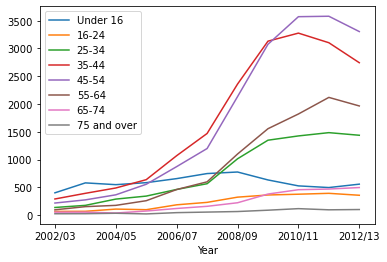

In [44]:
data_age_minus_total.plot()

<AxesSubplot:xlabel='Year'>

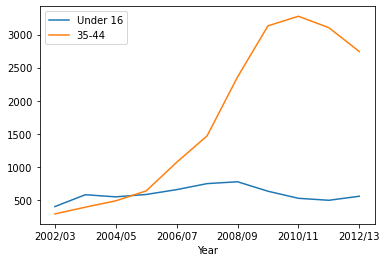

In [48]:
data_age['Under 16'].plot(label="Under 16", legend=True )
data_age['35-44'].plot(label="35-44", legend=True)

In [52]:
from datetime import datetime
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [54]:
df = pd.DataFrame(date_rng, columns=['date'])

df['data'] = np.random.randint(0,100,size=(len(date_rng)))

In [55]:
df

,date,data
0,2020-01-01 00:00:00,9
1,2020-01-01 01:00:00,50
2,2020-01-01 02:00:00,25
3,2020-01-01 03:00:00,44
4,2020-01-01 04:00:00,77
...,...,...
164,2020-01-07 20:00:00,48
165,2020-01-07 21:00:00,73
166,2020-01-07 22:00:00,59
167,2020-01-07 23:00:00,65


In [56]:
df['datetime'] = pd.to_datetime(df['date'])
df

,date,data,datetime
0,2020-01-01 00:00:00,9,2020-01-01 00:00:00
1,2020-01-01 01:00:00,50,2020-01-01 01:00:00
2,2020-01-01 02:00:00,25,2020-01-01 02:00:00
3,2020-01-01 03:00:00,44,2020-01-01 03:00:00
4,2020-01-01 04:00:00,77,2020-01-01 04:00:00
...,...,...,...
164,2020-01-07 20:00:00,48,2020-01-07 20:00:00
165,2020-01-07 21:00:00,73,2020-01-07 21:00:00
166,2020-01-07 22:00:00,59,2020-01-07 22:00:00
167,2020-01-07 23:00:00,65,2020-01-07 23:00:00


In [61]:
df = df.set_index('date')

In [62]:
df

,data
date,
2020-01-01 00:00:00,9
2020-01-01 01:00:00,50
2020-01-01 02:00:00,25
2020-01-01 03:00:00,44
2020-01-01 04:00:00,77
...,...
2020-01-07 20:00:00,48
2020-01-07 21:00:00,73
2020-01-07 22:00:00,59


In [63]:
string_date_rng = [str(x) for x in date_rng]

In [64]:
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [68]:
df[df.index.day == 5]


,data
date,
2020-01-05 00:00:00,26
2020-01-05 01:00:00,53
2020-01-05 02:00:00,46
2020-01-05 03:00:00,72
2020-01-05 04:00:00,37
2020-01-05 05:00:00,35
2020-01-05 06:00:00,35
2020-01-05 07:00:00,54
2020-01-05 08:00:00,32


In [69]:
df['2020-01-03']


,data
date,
2020-01-03 00:00:00,51
2020-01-03 01:00:00,93
2020-01-03 02:00:00,14
2020-01-03 03:00:00,14
2020-01-03 04:00:00,10
2020-01-03 05:00:00,6
2020-01-03 06:00:00,20
2020-01-03 07:00:00,82
2020-01-03 08:00:00,67


In [70]:
df['2020-01-04':'2020-01-06']


,data
date,
2020-01-04 00:00:00,82
2020-01-04 01:00:00,30
2020-01-04 02:00:00,4
2020-01-04 03:00:00,4
2020-01-04 04:00:00,98
...,...
2020-01-06 19:00:00,90
2020-01-06 20:00:00,58
2020-01-06 21:00:00,15


In [71]:
df.resample('D').mean()

,data
date,
2020-01-01,51.041667
2020-01-02,61.625000
2020-01-03,49.000000
2020-01-04,45.541667
2020-01-05,46.875000
2020-01-06,47.458333
2020-01-07,52.333333
2020-01-08,4.000000


In [72]:
df.resample('12H').mean()

,data
date,
2020-01-01 00:00:00,47.333333
2020-01-01 12:00:00,54.750000
2020-01-02 00:00:00,58.833333
2020-01-02 12:00:00,64.416667
2020-01-03 00:00:00,44.916667
2020-01-03 12:00:00,53.083333
2020-01-04 00:00:00,38.083333
2020-01-04 12:00:00,53.000000
2020-01-05 00:00:00,44.500000


In [73]:
df['rolling_sum'] = df.rolling(3).sum()


In [74]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')


In [76]:
df

,data,rolling_sum,rolling_sum_backfilled
date,,,
2020-01-01 00:00:00,9,NaN,84.0
2020-01-01 01:00:00,50,NaN,84.0
2020-01-01 02:00:00,25,84.0,84.0
2020-01-01 03:00:00,44,119.0,119.0
2020-01-01 04:00:00,77,146.0,146.0
...,...,...,...
2020-01-07 20:00:00,48,75.0,75.0
2020-01-07 21:00:00,73,139.0,139.0
2020-01-07 22:00:00,59,180.0,180.0


In [77]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')

In [78]:
opsd_daily

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [80]:
opsd_daily.shape

(4383, 5)

In [79]:
opsd_daily.isnull().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [81]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [83]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', index_col=0, parse_dates=True)


In [84]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [85]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

In [86]:
opsd_daily.loc['2014-01-20':'2014-01-22']


,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,2


In [87]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,3


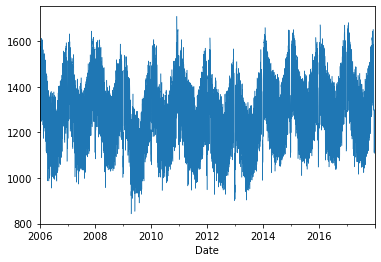

In [88]:
opsd_daily['Consumption'].plot(linewidth=0.5);


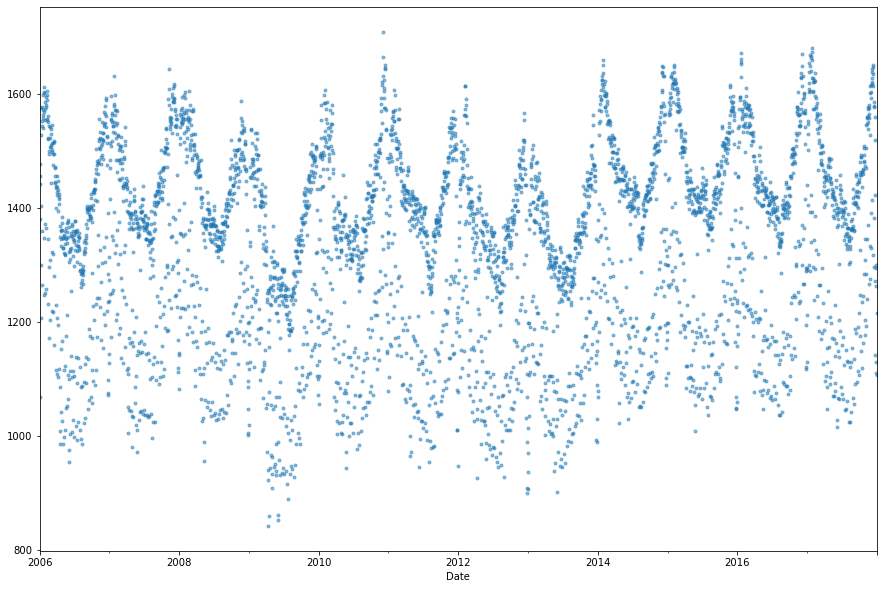

In [90]:
opsd_daily['Consumption'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 10));

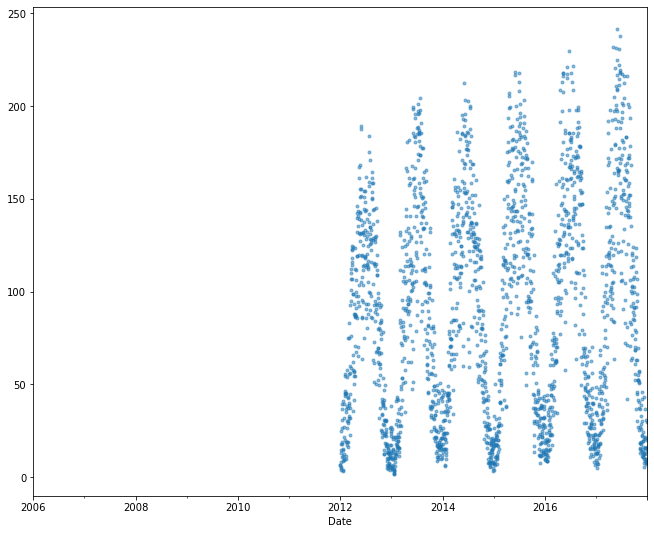

In [91]:
opsd_daily['Solar'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));


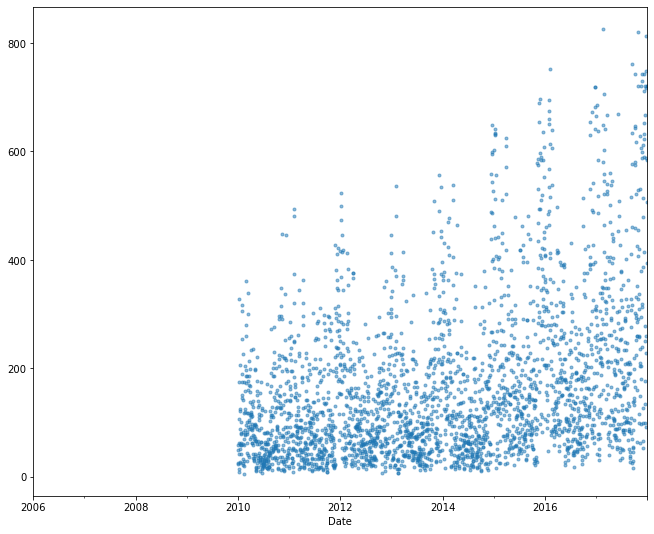

In [92]:
opsd_daily['Wind'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));


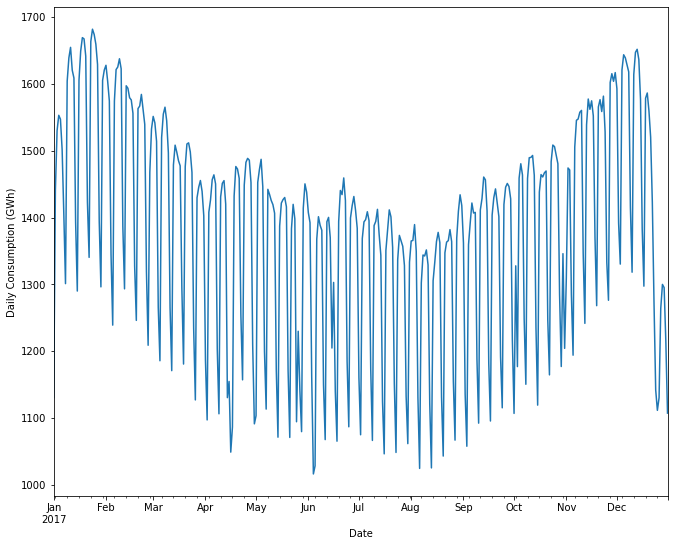

In [93]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11, 9))
ax.set_ylabel('Daily Consumption (GWh)');


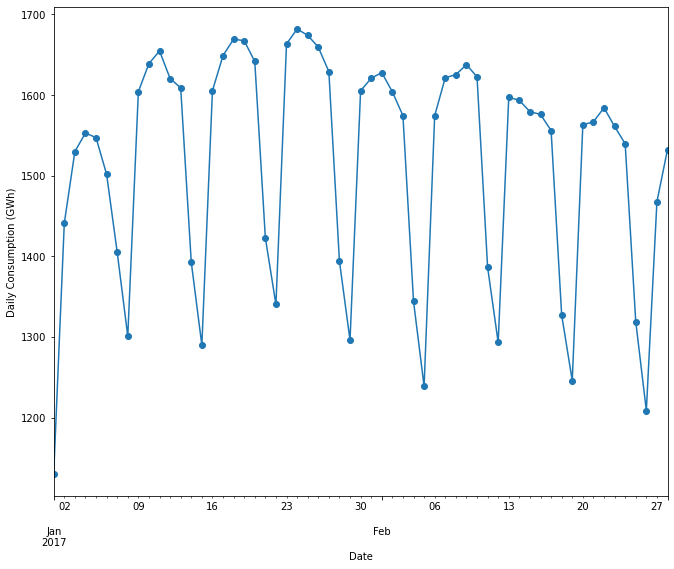

In [94]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-', figsize=(11, 9))
ax.set_ylabel('Daily Consumption (GWh)');


<AxesSubplot:title={'center':'Consumption'}, xlabel='Month'>

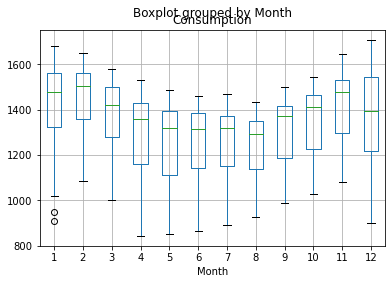

In [95]:
opsd_daily.boxplot(column=['Consumption'], by='Month')


<AxesSubplot:title={'center':'Wind'}, xlabel='Month'>

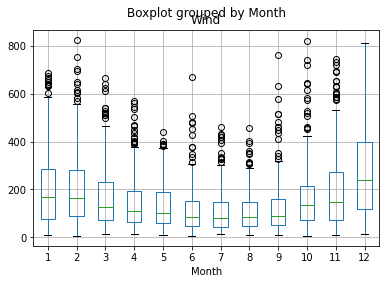

In [97]:
opsd_daily.boxplot(column=['Wind'], by='Month')


<AxesSubplot:title={'center':'Solar'}, xlabel='Month'>

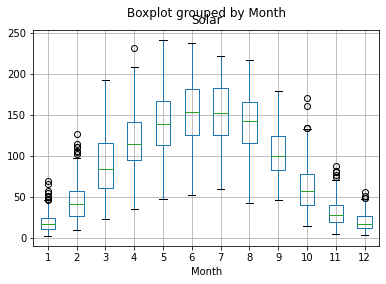

In [98]:
opsd_daily.boxplot(column=['Solar'], by='Month')


<AxesSubplot:title={'center':'Consumption'}, xlabel='Weekday'>

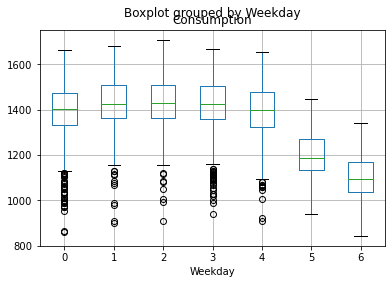

In [99]:
opsd_daily.boxplot(column=['Consumption'], by='Weekday')


<AxesSubplot:title={'center':'Wind'}, xlabel='Weekday'>

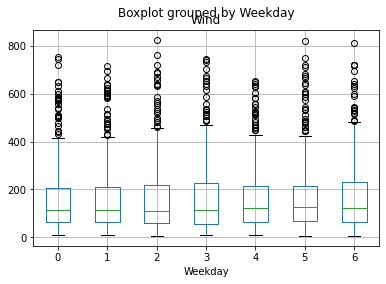

In [100]:
opsd_daily.boxplot(column=['Wind'], by='Weekday')


<AxesSubplot:title={'center':'Solar'}, xlabel='Weekday'>

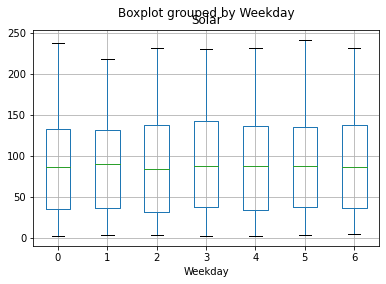

In [101]:
opsd_daily.boxplot(column=['Solar'], by='Weekday')


In [102]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [103]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


<AxesSubplot:xlabel='Date'>

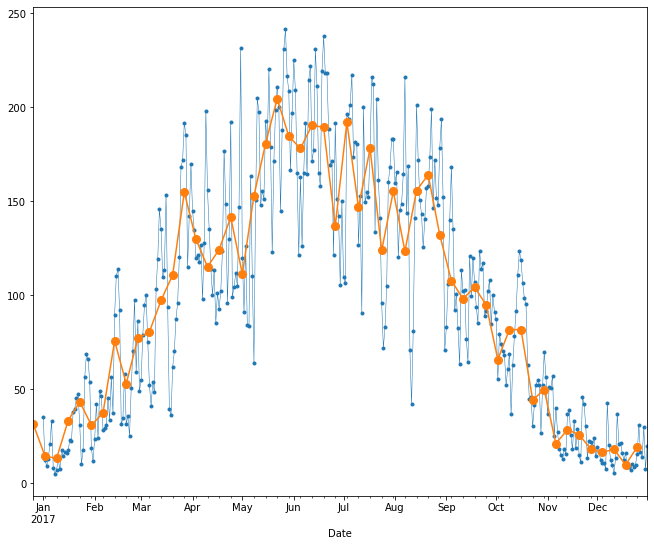

In [105]:
start, end = '2017-01', '2017-12'

opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='o', markersize=8, linestyle='-', figsize=(11, 9))

<AxesSubplot:xlabel='Date'>

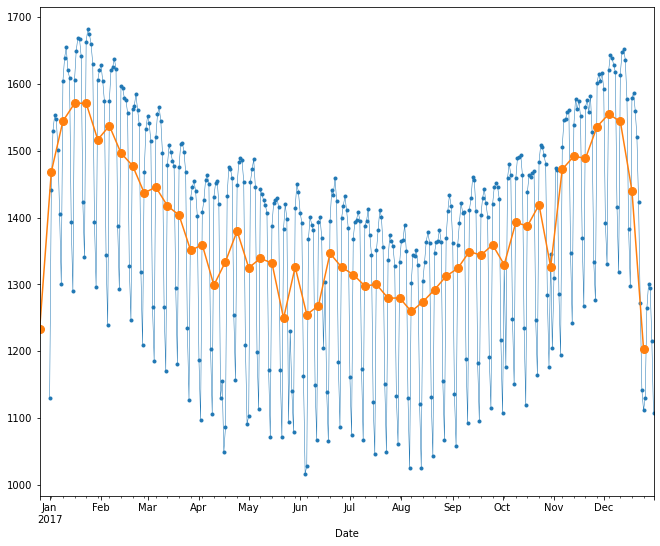

In [106]:
start, end = '2017-01', '2017-12'

opsd_daily.loc[start:end, 'Consumption'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 9))
opsd_weekly_mean.loc[start:end, 'Consumption'].plot(marker='o', markersize=8, linestyle='-', figsize=(11, 9))

<AxesSubplot:xlabel='Date'>

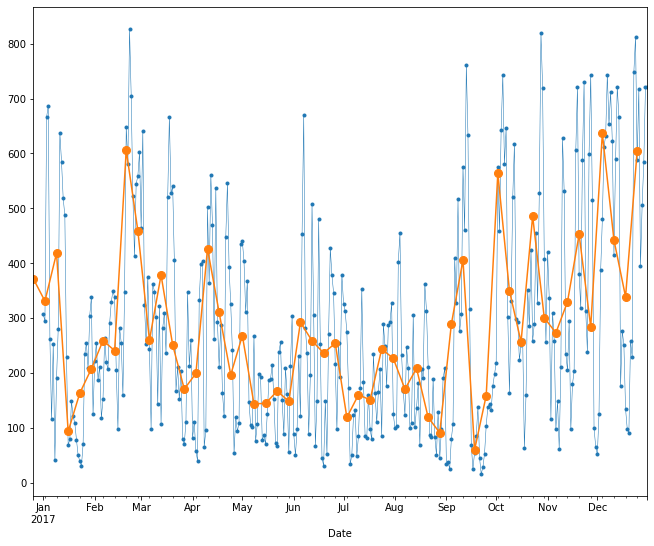

In [107]:
start, end = '2017-01', '2017-12'

opsd_daily.loc[start:end, 'Wind'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 9))
opsd_weekly_mean.loc[start:end, 'Wind'].plot(marker='o', markersize=8, linestyle='-', figsize=(11, 9))